learning Data Analysis


1. At what companies do developers get paid the most?
In this question, we want to identify which companies or industries pay developers the highest. To do this:

Use the CompTotal column, which represents the annual compensation of respondents.
Group by Industry to check which industries offer higher median pay.
Sort the industries by median pay to identify the top-paying sectors.

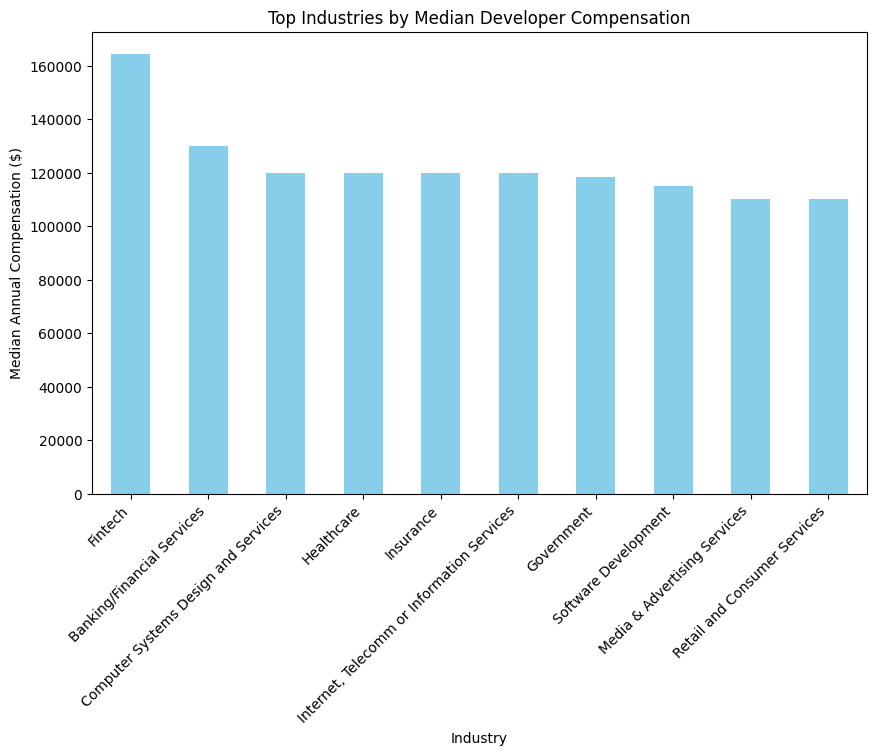

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\manir\Desktop\BLOG\datavis\data analysis\survey_results_public.csv")

# Filter out rows where CompTotal is missing or zero
df = df[df['CompTotal'].notnull() & (df['CompTotal'] > 0)]

# Group by Industry and calculate median compensation
top_industries = df.groupby('Industry')['CompTotal'].median().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_industries.plot(kind='bar', color='skyblue')
plt.title('Top Industries by Median Developer Compensation')
plt.xlabel('Industry')
plt.ylabel('Median Annual Compensation ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


2. How much does remote working matter to employees?
To understand the importance of remote work to employees:

Use the RemoteWork column, which contains data on respondents' remote work preferences.
Calculate the frequency of each response (e.g., "Fully remote", "Hybrid", "On-site").
Plot this as a pie chart or bar chart to visualize the preferences.

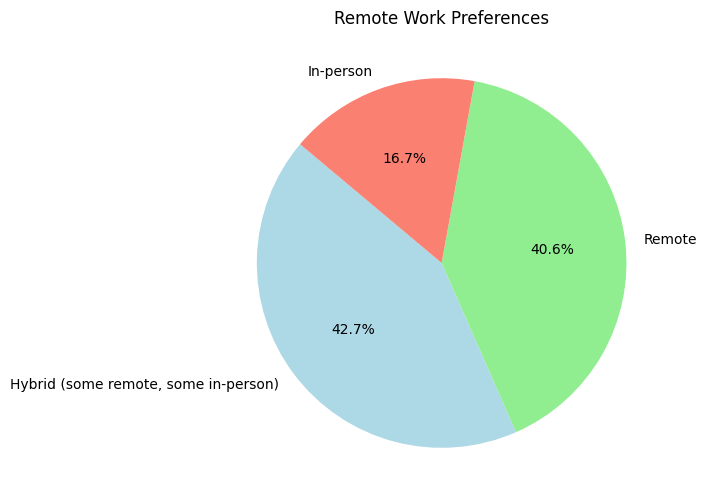

In [3]:
# Get remote work preferences distribution
remote_work_prefs = df['RemoteWork'].value_counts(normalize=True) * 100  # Convert to percentage

# Plot
plt.figure(figsize=(8, 6))
remote_work_prefs.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Remote Work Preferences')
plt.ylabel('')  # Hide y-label for aesthetics
plt.show()


3. How does coding experience affect the level of pay?
To see if coding experience influences compensation:

Use the YearsCode column to capture years of coding experience and convert it to numeric format.
Group by YearsCode and calculate the median CompTotal for each experience level.
Plot the relationship between years of coding experience and median compensation.

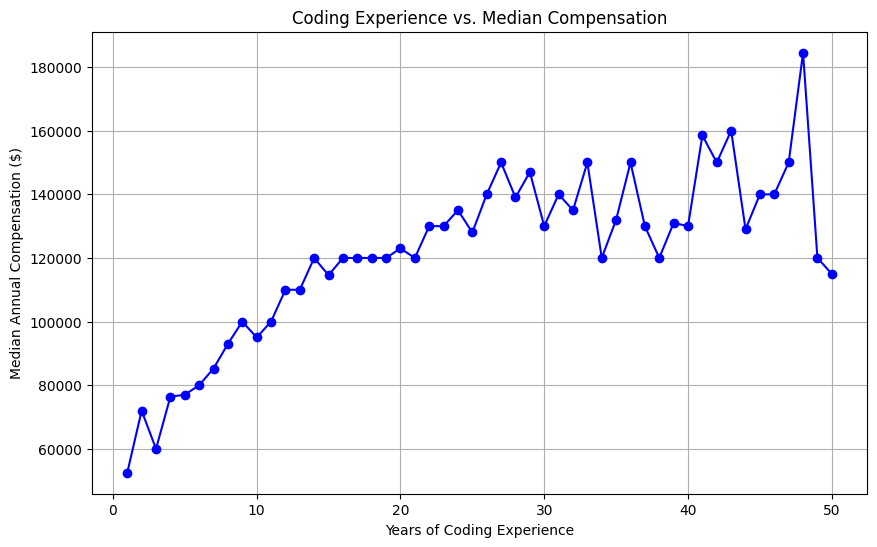

In [4]:
# Convert YearsCode to numeric, handling errors where values are non-numeric (e.g., "Less than 1 year")
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

# Group by YearsCode and calculate median compensation
experience_salary = df.groupby('YearsCode')['CompTotal'].median().dropna()

# Plot
plt.figure(figsize=(10, 6))
experience_salary.plot(kind='line', marker='o', color='b')
plt.title('Coding Experience vs. Median Compensation')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Median Annual Compensation ($)')
plt.grid(True)
plt.show()


4. What's the most popular method of learning to code?
For this analysis, use the LearnCode and LearnCodeOnline columns:

These columns are multi-select, so we need to split the answers by commas to handle multiple responses.
Count each unique method across all respondents to see which methods are the most popular.
Plot the results as a bar chart

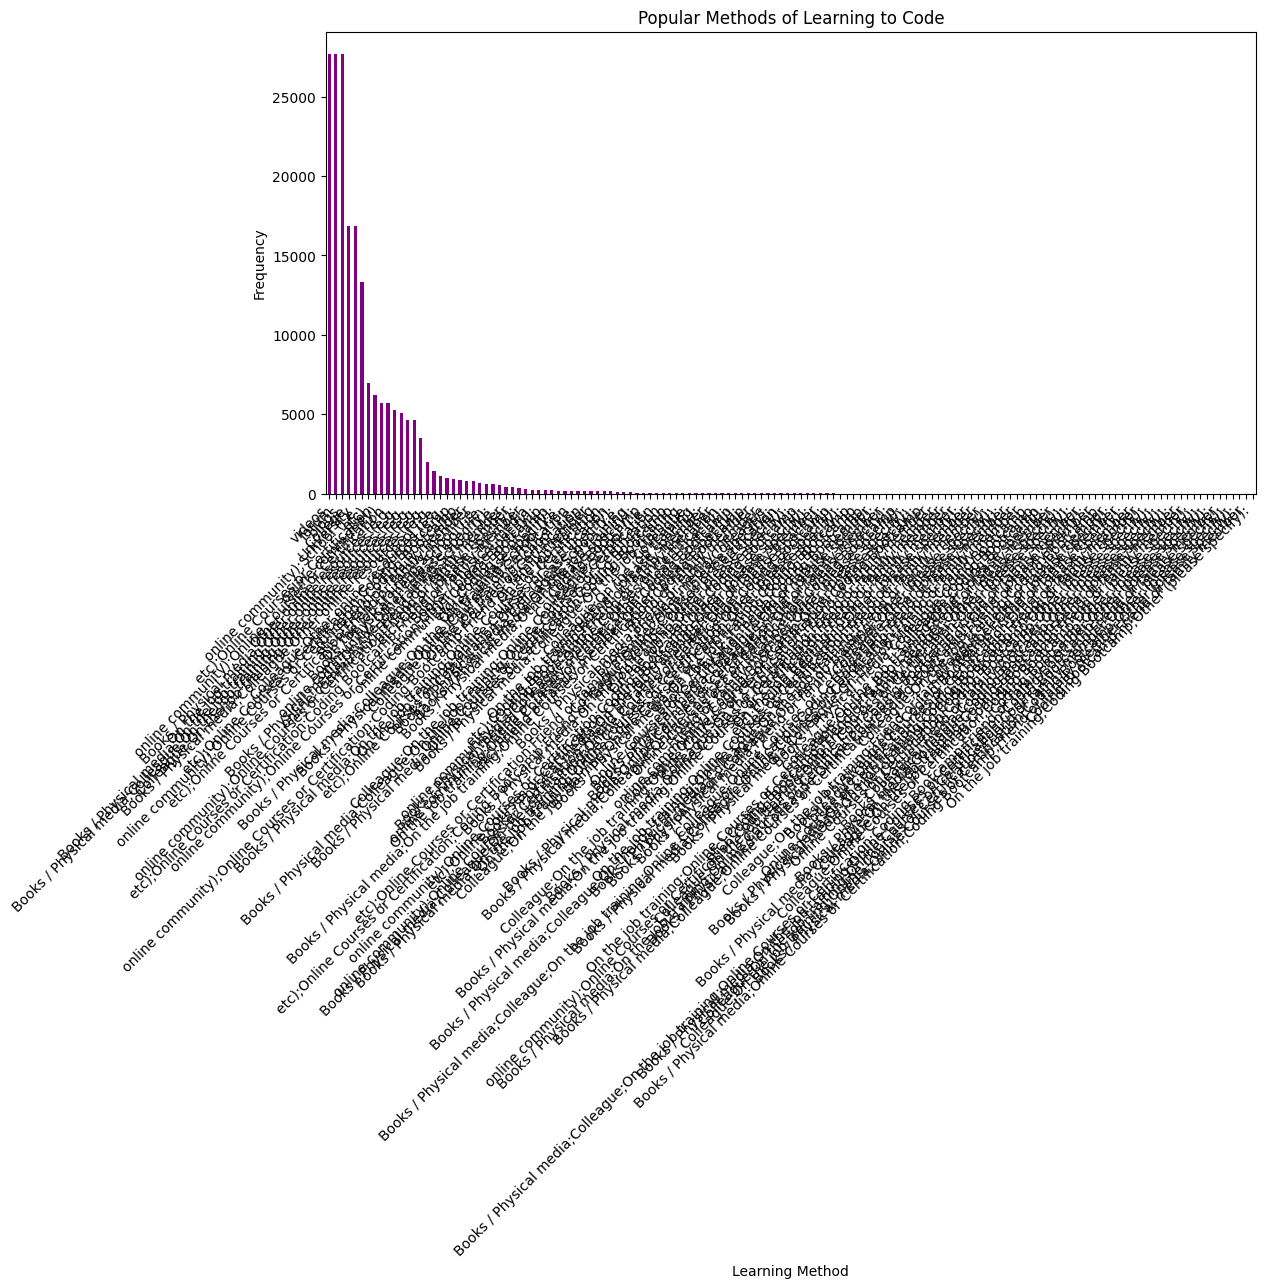

In [5]:
# Split multi-select answers and count the occurrences
learn_methods = df['LearnCode'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
learn_methods.plot(kind='bar', color='purple')
plt.title('Popular Methods of Learning to Code')
plt.xlabel('Learning Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [6]:
#%pip install nbformat==4.2





In [7]:
import plotly.io as pio
pio.renderers.default = 'browser'


In [8]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set the renderer to 'browser' to open the chart in a web browser
pio.renderers.default = 'browser'

# Assuming 'learn_methods' is calculated
# learn_methods = df['LearnCode'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
top_learn_methods = learn_methods.head(15)

# Create the interactive plot
fig = px.bar(
    top_learn_methods,
    x=top_learn_methods.values,
    y=top_learn_methods.index,
    orientation='h',
    title='Top Methods of Learning to Code',
    labels={'x': 'Frequency', 'y': 'Learning Method'},
    template='plotly_white'
)

# Update layout for readability
fig.update_layout(
    yaxis=dict(tickmode='linear'),
    title_x=0.5,
    height=600
)

# Show the figure in the default web browser
fig.show()



5. Are you more likely to get a job as a developer if you have a master’s degree?
To examine if higher education correlates with better job prospects:

Use the EdLevel column to identify respondents' highest education level.
Filter for those who are employed full-time and then group by education level.
Count the number of respondents with each level of education.
Plot this data to compare employment rates across education levels.

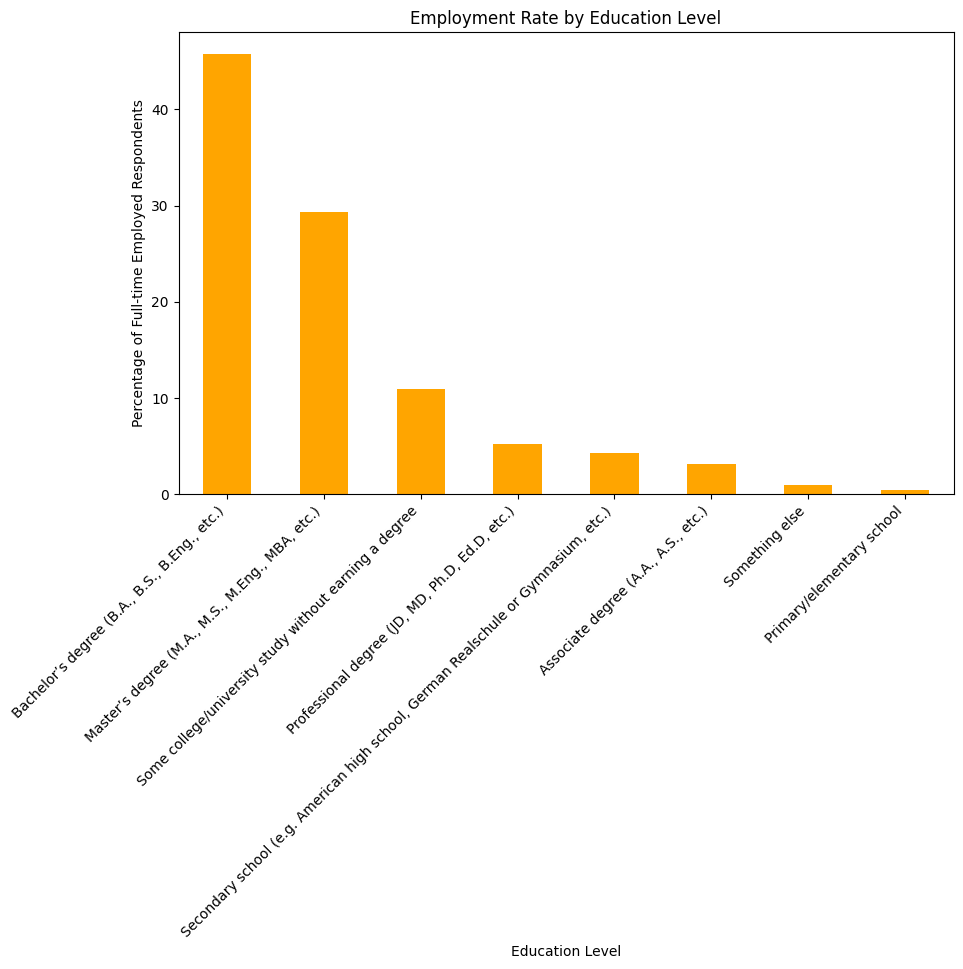

In [9]:
# Filter for rows where "Employed, full-time" is part of the Employment column
employed_df = df[df['Employment'].str.contains('Employed, full-time', na=False)]

# Check if data exists
if employed_df.empty:
    print("No data found for full-time employees after cleaning.")
else:
    # Count employment by education level
    education_job = employed_df['EdLevel'].value_counts(normalize=True) * 100  # Convert to percentage
    
    # Check if education_job has data
    if education_job.empty:
        print("No data found for education levels among full-time employees.")
    else:
        # Plot if there is data
        plt.figure(figsize=(10, 6))
        education_job.plot(kind='bar', color='orange')
        plt.title('Employment Rate by Education Level')
        plt.xlabel('Education Level')
        plt.ylabel('Percentage of Full-time Employed Respondents')
        plt.xticks(rotation=45, ha='right')
        plt.show()



In [10]:
print(df['Employment'].unique())


['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time'
 'Student, part-time;Employed, part-time'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'Retired'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Not employed, but looking for work' 'Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Employed, full-time;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time'
 'Employed, full-time;Not emplo

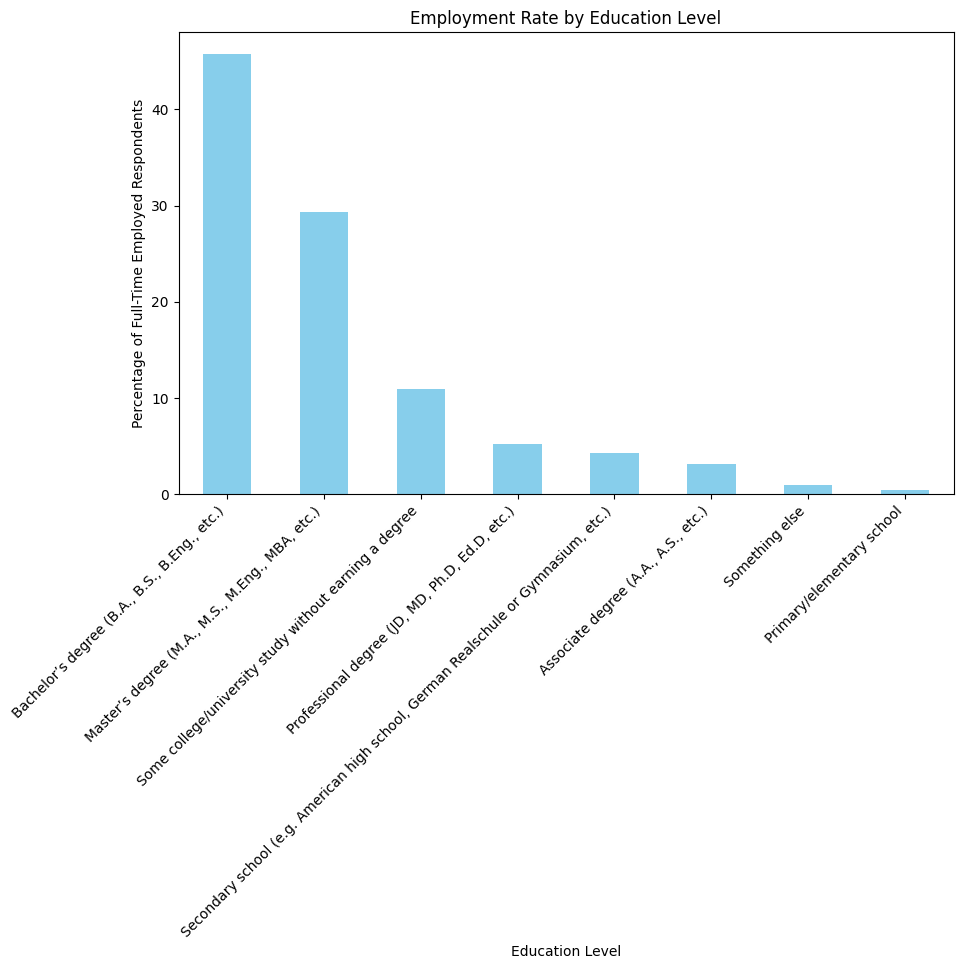

In [11]:


# Load your data into a DataFrame (assuming df is your DataFrame)
# df = pd.read_csv("path_to_your_data.csv")  # Uncomment and use the correct path

# Step 1: Filter for respondents who are employed full-time
employed_full_time = df[df['Employment'].str.contains('Employed, full-time', na=False)]

# Step 2: Group by education level and count the number of full-time employees in each level
education_counts = employed_full_time['EdLevel'].value_counts(normalize=True) * 100  # Convert to percentages

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Employment Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Full-Time Employed Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()


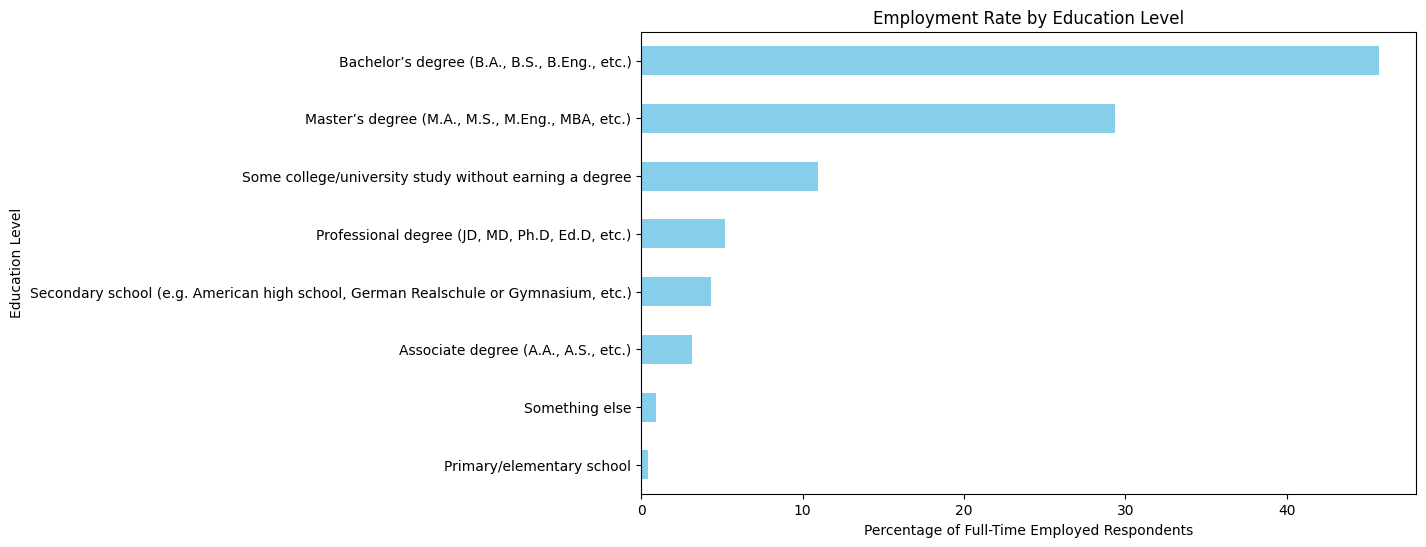

In [12]:
import matplotlib.pyplot as plt

# Sort the data for easier interpretation
education_counts_sorted = education_counts.sort_values()

# Plot as a horizontal bar chart
plt.figure(figsize=(10, 6))
education_counts_sorted.plot(kind='barh', color='skyblue')
plt.title('Employment Rate by Education Level')
plt.xlabel('Percentage of Full-Time Employed Respondents')
plt.ylabel('Education Level')
plt.show()


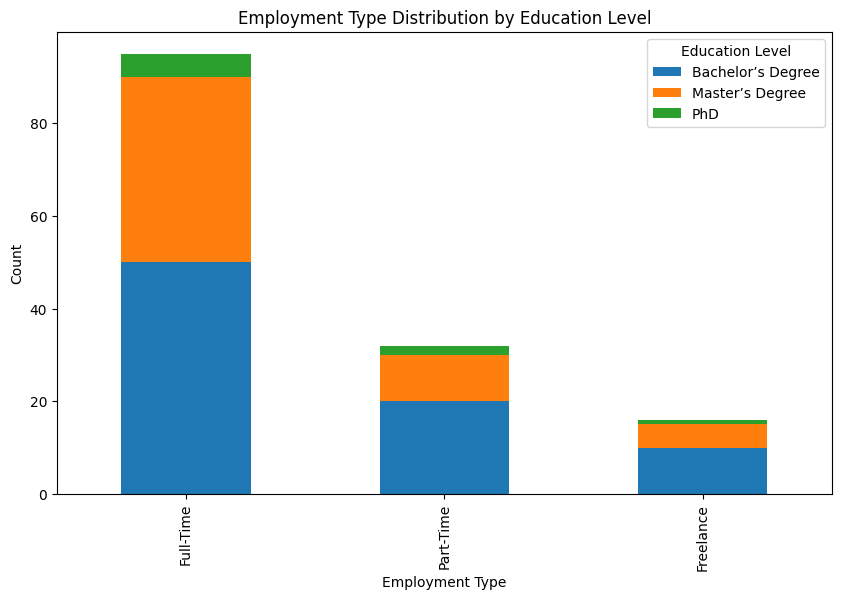

In [13]:
# Hypothetical data with employment types
employment_types = ['Full-Time', 'Part-Time', 'Freelance']
# Replace with actual data if available
education_employment_counts = pd.DataFrame({
    'Bachelor’s Degree': [50, 20, 10],
    'Master’s Degree': [40, 10, 5],
    'PhD': [5, 2, 1]
}, index=employment_types)

# Plot stacked bar chart
education_employment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.show()


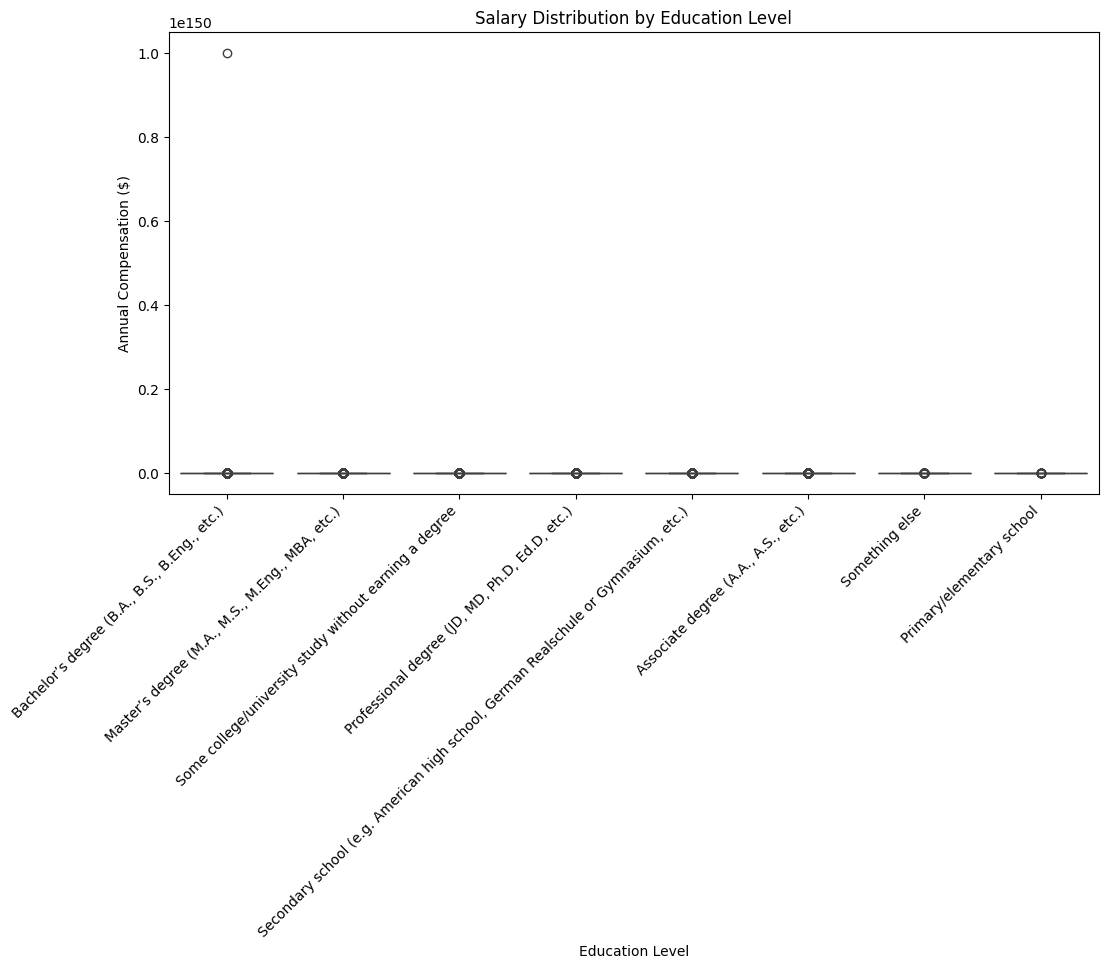

In [14]:
# Sample box plot data
# df['CompTotal'] contains salary data and df['EdLevel'] contains education level data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EdLevel', y='CompTotal', order=education_counts.index)  # Order by existing education level
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Annual Compensation ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


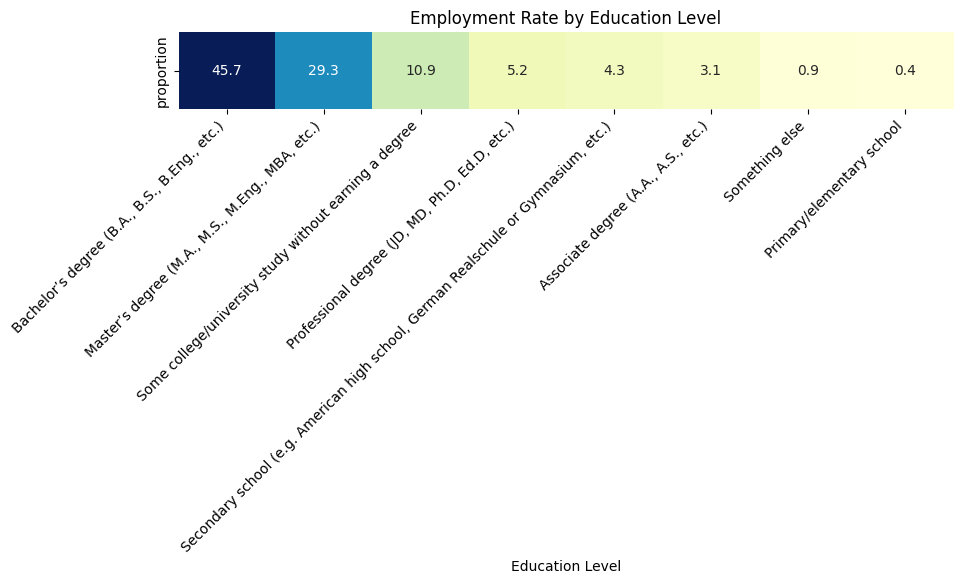

In [15]:
import seaborn as sns

# Convert data to a DataFrame suitable for heatmap
employment_heatmap_data = pd.DataFrame(education_counts).T

# Plot heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(employment_heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
plt.title('Employment Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()


In [16]:
import plotly.express as px

# Plot interactive bar chart with Plotly
fig = px.bar(
    education_counts,
    x=education_counts.index,
    y=education_counts.values,
    labels={'x': 'Education Level', 'y': 'Percentage of Full-Time Employed Respondents'},
    title='Employment Rate by Education Level'
)
fig.update_layout(
    xaxis_tickangle=-45,
    title_x=0.5,
    height=500
)
fig.show()
